In [1]:
import pandas as pd
from surprise import Dataset
from surprise import Reader
from surprise import KNNWithMeans
from surprise.model_selection import cross_validate
from surprise.model_selection import train_test_split
import numpy as np
import pickle
import random 
from surprise import accuracy
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score

import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

In [2]:
from surprise import NMF, CoClustering, SVD

In [3]:
random.seed(10)

In [4]:
ratings = pd.read_csv('ml-latest/ratings.csv')
#print(ratings.head())
movies = pd.read_csv("movies_FINAL.csv")
#print(movies.head())

In [5]:
reader = Reader(rating_scale=(0.5, 5))
data = Dataset.load_from_df(ratings[["userId", "movieId", "rating"]], reader)

In [6]:
trainset, testset = train_test_split(data, test_size=.2)

In [7]:
#algo = SVD()
#algo.fit(trainset)
#pickle.dump(algo, open(filename, 'wb'))

In [8]:
filename = 'SVD_model.sav'
algo = pickle.load(open(filename, 'rb'))

In [9]:
algo.predict(1, 307, r_ui =3.5,verbose=True)

user: 1          item: 307        r_ui = 3.50   est = 3.98   {'was_impossible': False}


Prediction(uid=1, iid=307, r_ui=3.5, est=3.976031439838299, details={'was_impossible': False})

In [10]:
import dalex as dx 

In [21]:
zipp = list(zip(*testset))

In [34]:
df = pd.DataFrame(data={'col1': zipp[0], 'col2': zipp[1]})

In [36]:
exp = dx.Explainer(algo, data=df, y=np.ndarray(zipp[2]), label='svm')

ValueError: maximum supported dimension for an ndarray is 32, found 5550689

In [13]:
testset

[(120586, 303, 3.5),
 (272599, 1372, 3.0),
 (57231, 1357, 3.5),
 (149118, 3992, 4.0),
 (165507, 84374, 4.5),
 (136665, 3104, 3.0),
 (97911, 33162, 3.5),
 (63488, 48516, 4.0),
 (65868, 157557, 5.0),
 (108965, 318, 4.0),
 (109827, 55442, 5.0),
 (127142, 2664, 4.0),
 (5747, 133712, 3.5),
 (191365, 485, 2.0),
 (132948, 158904, 5.0),
 (224914, 72129, 3.0),
 (51335, 2571, 5.0),
 (271099, 388, 3.0),
 (25821, 44694, 4.0),
 (130558, 2937, 3.0),
 (143806, 8636, 4.5),
 (175905, 2795, 4.0),
 (161363, 60072, 4.0),
 (23894, 2959, 5.0),
 (81392, 103050, 3.0),
 (34726, 509, 4.0),
 (158073, 4615, 4.0),
 (3162, 7054, 3.0),
 (12218, 2716, 3.5),
 (26940, 7323, 4.0),
 (78492, 91660, 2.5),
 (60494, 3504, 3.0),
 (176026, 211, 4.0),
 (266770, 161, 3.0),
 (196615, 2580, 4.0),
 (270510, 2078, 2.5),
 (133730, 2803, 2.0),
 (186272, 3, 3.0),
 (11465, 140174, 4.0),
 (213236, 230, 4.0),
 (273489, 162, 5.0),
 (131128, 410, 5.0),
 (161166, 6059, 4.0),
 (173520, 2872, 4.5),
 (198767, 40815, 2.5),
 (134190, 154, 4.0),
 

In [10]:
predictions = algo.test(testset)

In [11]:
predictions[0:10]

[Prediction(uid=26840, iid=1784, r_ui=3.0, est=3.7045667103421254, details={'was_impossible': False}),
 Prediction(uid=67969, iid=4642, r_ui=3.0, est=3.757474451771837, details={'was_impossible': False}),
 Prediction(uid=155844, iid=4638, r_ui=1.0, est=2.262168677992748, details={'was_impossible': False}),
 Prediction(uid=74187, iid=45981, r_ui=0.5, est=2.1278435914000626, details={'was_impossible': False}),
 Prediction(uid=171978, iid=3551, r_ui=5.0, est=4.17099538705374, details={'was_impossible': False}),
 Prediction(uid=247038, iid=593, r_ui=5.0, est=4.719179232599432, details={'was_impossible': False}),
 Prediction(uid=256418, iid=34405, r_ui=4.5, est=4.325987417195747, details={'was_impossible': False}),
 Prediction(uid=112703, iid=151, r_ui=5.0, est=3.609080062086605, details={'was_impossible': False}),
 Prediction(uid=69143, iid=64716, r_ui=3.5, est=3.1321057030573787, details={'was_impossible': False}),
 Prediction(uid=144191, iid=47610, r_ui=3.0, est=3.5365664908936325, detai

In [41]:
def isLiked(pred):
    return (pred.r_ui>=3.5)*1

In [42]:
def isRecommended(pred):
    return (pred.est>=3.5)*1

In [14]:
recommend = list(map(isRecommended, predictions))

In [15]:
liked = list(map(isLiked, predictions))

In [16]:
cm =confusion_matrix(liked, recommend)

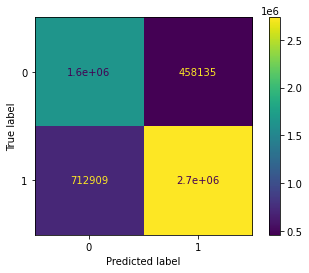

In [17]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

In [18]:
accuracy_score(liked, recommend)

0.7890272721098227

In [19]:
precision_score(liked, recommend, average='binary')

0.8565734794224807

In [20]:
f1_score(liked, recommend, average='binary')

0.8237229576941961

In [21]:
#rmse for rating prediction NOT recommendation
accuracy.rmse(predictions)

RMSE: 0.7027


0.7027433412040055

In [22]:
#algo2 = NMF()
#algo2.fit(trainset)
#pickle.dump(algo, open(filename2, 'wb'))

In [23]:
filename2 = 'NMF_model.sav'
algo2 = pickle.load(open(filename2, 'rb'))

In [24]:
predictions2 = algo2.test(testset)

In [25]:
recommend2 = list(map(isRecommended, predictions2))

In [26]:
cm2 =confusion_matrix(liked, recommend2)

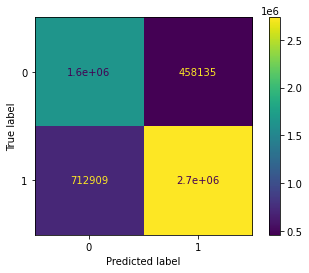

In [27]:
disp2 = ConfusionMatrixDisplay(confusion_matrix=cm2)
disp2.plot()
plt.show()

In [28]:
accuracy_score(liked, recommend2)

0.7890272721098227

In [29]:
precision_score(liked, recommend2, average='binary')

0.8565734794224807

In [30]:
algo2.predict(1, 307, r_ui =3.5,verbose=True)

user: 1          item: 307        r_ui = 3.50   est = 3.98   {'was_impossible': False}


Prediction(uid=1, iid=307, r_ui=3.5, est=3.976031439838299, details={'was_impossible': False})

In [31]:
predictions2 = algo2.test(testset)
accuracy.rmse(predictions2)

RMSE: 0.7027


0.7027433412040055

In [32]:
#d = data.build_full_trainset()

In [33]:
#algo4 = CoClustering()
#algo4.fit(d)
#pickle.dump(algo4, open(filename3, 'wb'))

In [35]:
filename3 = 'Cluster_model.sav'
algo3 = pickle.load(open(filename3, 'rb'))

In [ ]:
predictions3 = algo3.test(testset)

In [ ]:
recommend3 = list(map(isRecommended, predictions3))

In [ ]:
cm3 =confusion_matrix(liked, recommend3)

In [ ]:
disp3 = ConfusionMatrixDisplay(confusion_matrix=cm3)
disp3.plot()
plt.show()

In [ ]:
accuracy_score(liked, recommend3)

In [ ]:
precision_score(liked, recommend3, average='binary')

In [ ]:
predictions3 = algo3.test(testset)
accuracy.rmse(predictions3)

SVD - RMSE: 0.7950 - 910 MB
NMF - RMSE: 0.8777 - 910 MB
CoClustering - RMSE: 0.8759 - 824 MB

Modele są bardzo podobne jednak SVD jest odrobinę lepszy od pozostałych oraz szybszy, więc na nim się skupimy

Najważniejszą metryką w naszym modelu jest przede wszystkim f1 i precision, ponieważ chcemy zminimalizować ilość False Positives. Zarekomendowanie złego filmu jest dla nas gorsze od pominięcia dobrego. 

Poniżej przetestowane inne odcięcia rekomendacji. Oczywiście im mniejsze odcięcie tym lepsze metryki, ale nie chcemy uznawać filmu ocenianego na 2.5 na warty polecenia. Dla wartości 3 metryki nie są znacząco lepsze, więc zostajemy na 3.5 .

Same hiperparametry modelów zostawiamy automatycznie ponieważ ich trenowanie zajmuje naprawdę dużo czasu

In [ ]:
def isLiked(pred):
    return (pred.r_ui>=4)*1

In [ ]:
def isRecommended(pred):
    return (pred.est>=4)*1

In [ ]:
recommend = list(map(isRecommended, predictions))

In [ ]:
liked = list(map(isLiked, predictions))

In [ ]:
cm =confusion_matrix(liked, recommend)

In [ ]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

In [ ]:
accuracy_score(liked, recommend)

In [ ]:
precision_score(liked, recommend, average='binary')

In [ ]:
f1_score(liked, recommend, average='binary')

In [ ]:
def isLiked(pred):
    return (pred.r_ui>=4.5)*1

In [ ]:
def isRecommended(pred):
    return (pred.est>=4.5)*1

In [ ]:
recommend = list(map(isRecommended, predictions))

In [ ]:
liked = list(map(isLiked, predictions))

In [ ]:
cm =confusion_matrix(liked, recommend)

In [ ]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

In [ ]:
accuracy_score(liked, recommend)

In [ ]:
precision_score(liked, recommend, average='binary')

In [ ]:
f1_score(liked, recommend, average='binary')

In [ ]:
def isLiked(pred):
    return (pred.r_ui>=3)*1

In [ ]:
def isRecommended(pred):
    return (pred.est>=3)*1

In [ ]:
recommend = list(map(isRecommended, predictions))

In [ ]:
liked = list(map(isLiked, predictions))

In [ ]:
cm =confusion_matrix(liked, recommend)

In [ ]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

In [ ]:
accuracy_score(liked, recommend)

In [ ]:
precision_score(liked, recommend, average='binary')

In [ ]:
f1_score(liked, recommend, average='binary')

In [ ]:
def isLiked(pred):
    return (pred.r_ui>=2.5)*1

In [ ]:
def isRecommended(pred):
    return (pred.est>=2.5)*1

In [ ]:
recommend = list(map(isRecommended, predictions))

In [ ]:
liked = list(map(isLiked, predictions))

In [ ]:
cm =confusion_matrix(liked, recommend)

In [ ]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

In [ ]:
accuracy_score(liked, recommend)

In [ ]:
precision_score(liked, recommend, average='binary')

In [ ]:
f1_score(liked, recommend, average='binary')